In [1]:
import cv2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

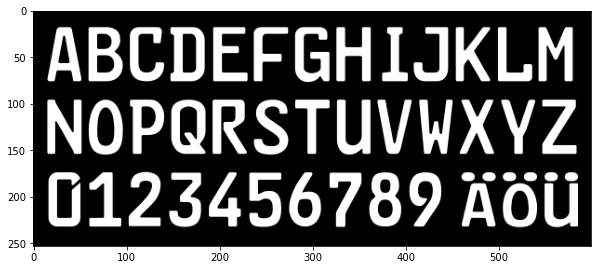

In [20]:
fonts = cv2.imread('number_plate_fonts.png', -1)
fonts = 255 - ~fonts[:, :, 3]
plt.figure(figsize=(10, 10))
plt.imshow(fonts, cmap='gray')

In [23]:
(num_labels, labels, stats, centroids) = cv2.connectedComponentsWithStats(fonts, 4, cv2.CV_32S)
print(f'Number of connected components: {num_labels}')

Number of connected components: 46


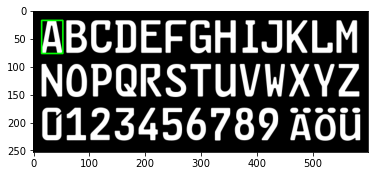

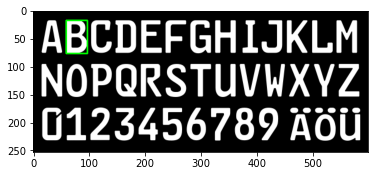

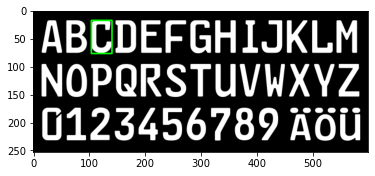

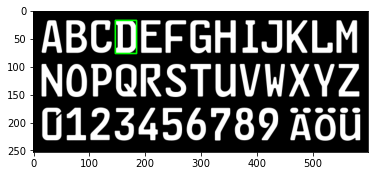

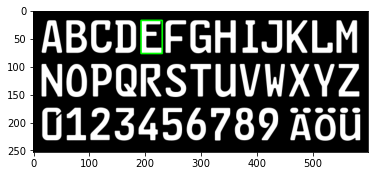

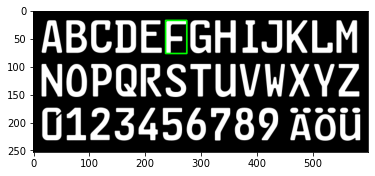

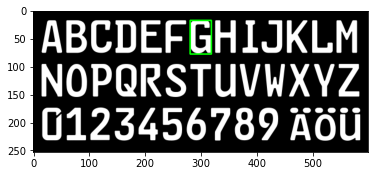

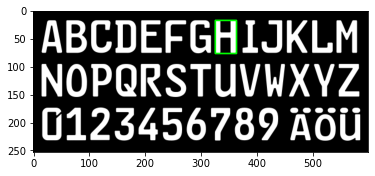

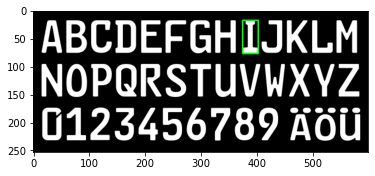

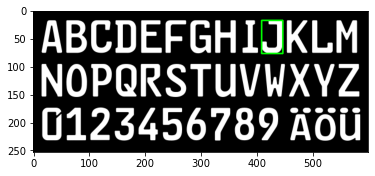

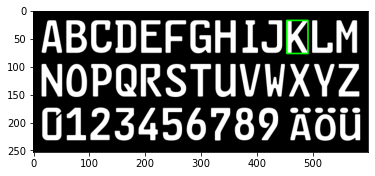

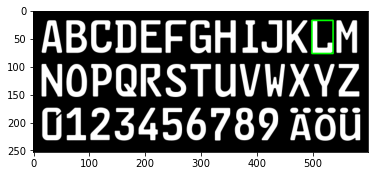

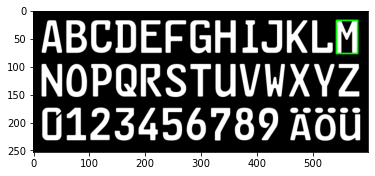

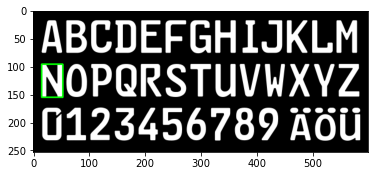

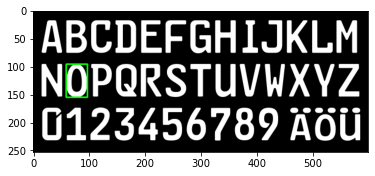

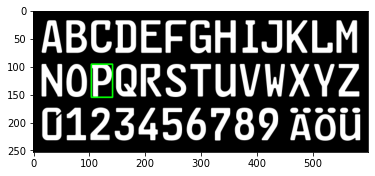

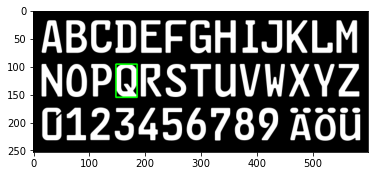

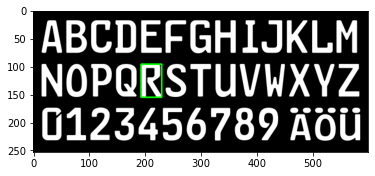

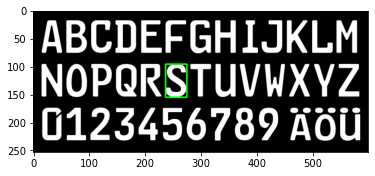

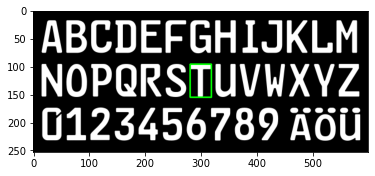

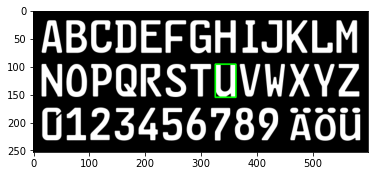

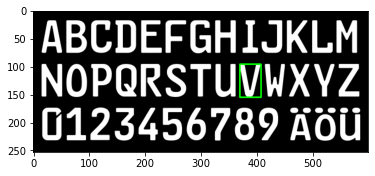

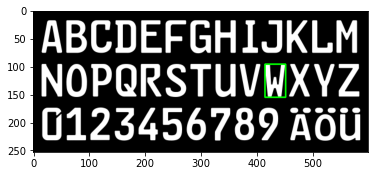

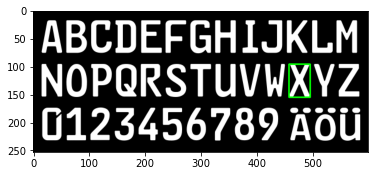

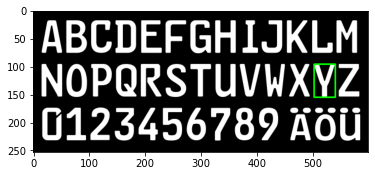

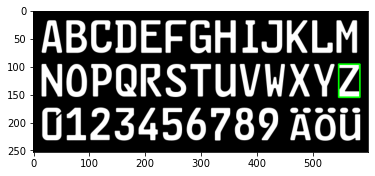

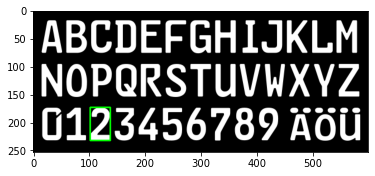

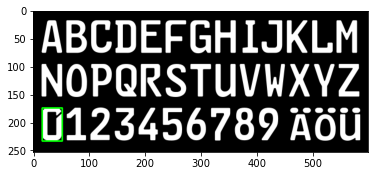

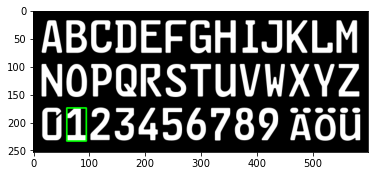

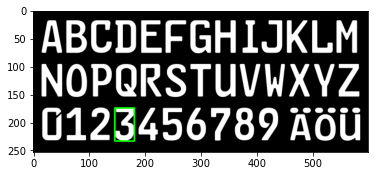

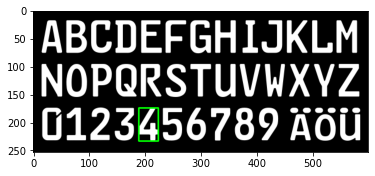

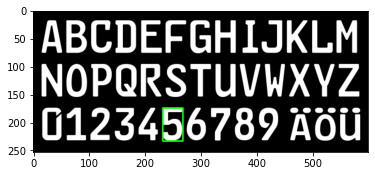

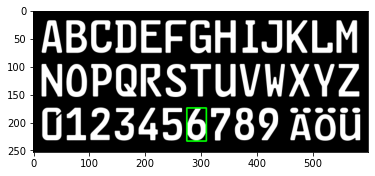

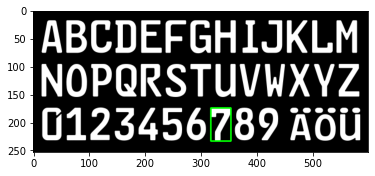

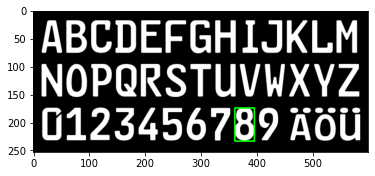

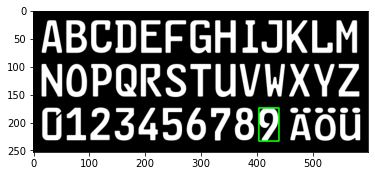

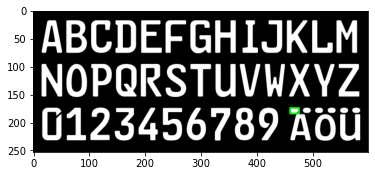

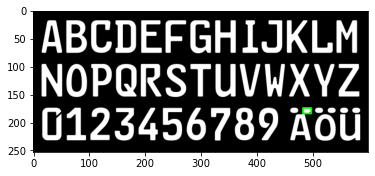

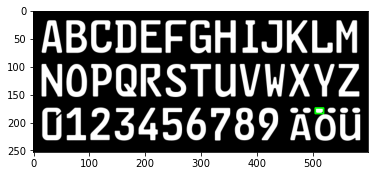

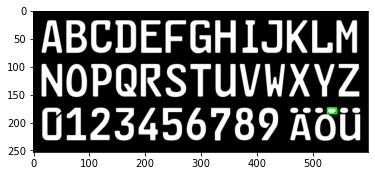

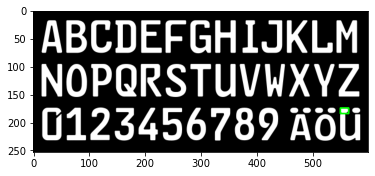

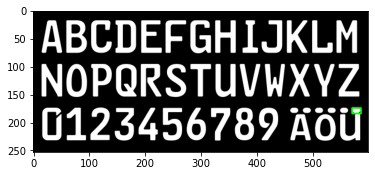

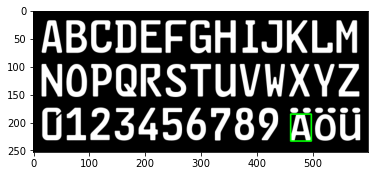

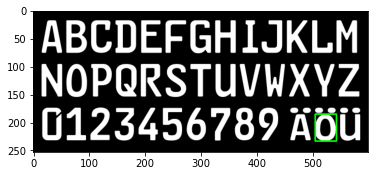

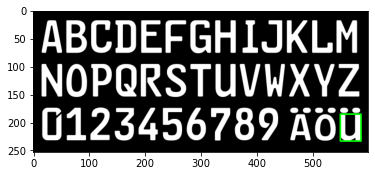

In [29]:
# 0th component is background
for i in range(1, num_labels):
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    out = fonts.copy()
    out = cv2.cvtColor(out, cv2.COLOR_GRAY2BGR)
    cv2.rectangle(out, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plt.imshow(out)
    plt.show()

In [32]:
for i in tqdm(range(1, num_labels), desc='Segmenting characters'):
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    char = fonts[y:y + h, x:x + w]
    cv2.imwrite(f'fonts/char_{i}.png', char)

Segmenting characters: 100%|██████████| 45/45 [00:00<00:00, 351.56it/s]


### Number Plate Province Codes

CP - Central Province<br>
EP - Eastern Province<br>
NC - North Central province<br>
NE - North Eastern province<br>
NW - North Western province<br>
SB - Sabaragamuwa province<br>
SP - Southern Province<br>
UP - Uva Province<br>
WP - Western Province<br>

Thus, alphabets that can be appeared in the province code are: B, C, E, N, P, S, U, W